In [1]:
from fastai.conv_learner import *
import pandas as pd
import numpy as np
import pathlib
import fastai.plots as fp
import sklearn.metrics as metrics
from classifier import ClassifierTrainer
import json
import datetime

/home/sean/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from train_classifier import create_trainer, save_params, weights_params_paths, get_val_idx

In [6]:
PATH = Path('/home/sean/hpc-home/skin_cancer')
arch = resnet34
im_size = 100
bs = 64
num_workers = 8

train_csv = PATH / 'train_multi_mel.csv'
test_csv = PATH / 'ISIC/test_mel_17.csv'
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
test_path = PATH / test_folder
weight_name = 'resnet101_mel_allds'

assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
val_idx = get_val_idx(train_csv)

weight_name, params_file_name = weights_params_paths(weight_name)

params_dict = {'path': PATH, 'arch': arch, 'sz': im_size,
               'bs': bs, 'trn_csv': train_csv, 'sn': weight_name,
               'test_csv': test_csv, 'test_folder': test_folder, 'val_idx': val_idx,
               'precom': False, 'num_workers': num_workers, 'lr': 1e-2, 'aug_tfms': transforms_top_down,
               'params_fn': params_file_name, 'precom': False}
print(params_dict)

{'path': PosixPath('/home/sean/hpc-home/skin_cancer'), 'arch': <function resnet101 at 0x7f3194a9b048>, 'sz': 200, 'bs': 64, 'trn_csv': PosixPath('/home/sean/hpc-home/skin_cancer/train_multi_mel.csv'), 'sn': 'resnet101_mel_allds_2018-12-10', 'test_csv': PosixPath('/home/sean/hpc-home/skin_cancer/ISIC/test_mel_17.csv'), 'test_folder': 'ISIC/ISIC-2017_Test_v2_Data_Classification/', 'val_idx': range(5465, 5615), 'precom': False, 'num_workers': 8, 'lr': 0.01, 'aug_tfms': [<fastai.transforms.RandomRotate object at 0x7f318e74c0b8>, <fastai.transforms.RandomLighting object at 0x7f318e74c048>, <fastai.transforms.RandomDihedral object at 0x7f318e74c160>], 'params_fn': '/home/sean/src/fastai/courses/projects/param_files/resnet101_mel_allds_2018-12-10__14-07_.json'}


In [14]:
# test_df = pd.read_csv(test_csv, index_col=[0])
# test_df.index = [ss.replace('/ISIC-2017_Test_v2_Data/', '/ISIC-2017_Test_v2_Data_Classification/') for ss in test_df.index]
# test_df.head()
# # test_df.to_csv(test_csv)

,melanoma
ISIC/ISIC-2017_Test_v2_Data_Classification/ISIC_0012086.jpg,0
ISIC/ISIC-2017_Test_v2_Data_Classification/ISIC_0012092.jpg,0
ISIC/ISIC-2017_Test_v2_Data_Classification/ISIC_0012095.jpg,0
ISIC/ISIC-2017_Test_v2_Data_Classification/ISIC_0012134.jpg,0
ISIC/ISIC-2017_Test_v2_Data_Classification/ISIC_0012136.jpg,0


In [7]:
save_params(params_file_name, params_dict)
trainer = create_trainer(params_dict)

Saving model as "resnet101_mel_allds_2018-12-10"
Dataset has: ['0', '1'] classes


In [8]:
trainer.check_test_names()

In [9]:
trainer.init_fit()

epoch      trn_loss   val_loss   accuracy                  
    0      0.375828   0.493311   0.8       
    1      0.306038   0.422047   0.813333                  



epoch      trn_loss   val_loss   accuracy                  
    0      0.281152   0.437654   0.813333  
    1      0.274069   0.443074   0.806667                  

Saved weights as "resnet101_mel_allds_2018-12-10"


In [10]:
trainer.plot_training()

TypeError: zip argument #1 must support iteration

Saving plots as "/home/sean/src/fastai/courses/projects/param_files/resnet101_mel_allds_2018-12-10__14-07_/resnet101_mel_allds_2018-12-10.png"


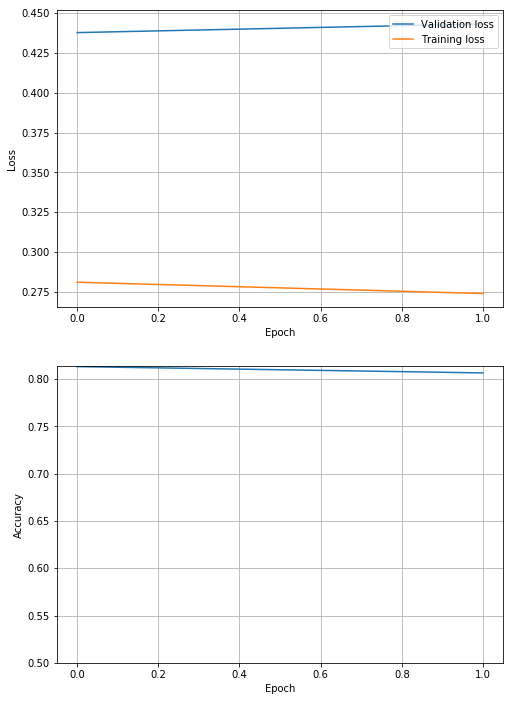

In [24]:
def plot_loss(train_losses, val_losses, rec_metrics, num_ep, epoch_iters):
    fig, ax = plt.subplots(2, 1, figsize=(8, 12))
    ax[0].grid()
    ax[0].plot(list(range(num_ep)), val_losses, label='Validation loss')
    ax[0].plot(list(range(num_ep)), [train_losses[i-1]
                                    for i in epoch_iters], 
                                    label='Training loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='upper right')
    ax[1].plot(list(range(num_ep)), rec_metrics)
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_ylim(bottom=min(0.5, min(rec_metrics)))
    ax[1].grid()
    return fig, ax

trnl = trainer.learn.sched.losses
vall = trainer.learn.sched.val_losses
metrics = trainer.learn.sched.rec_metrics
num_ep = trainer.learn.sched.epoch
ep_iterations = trainer.learn.sched.epochs
fig, ax = plot_loss(trnl, vall, metrics, num_ep, ep_iterations)

fig_fold = os.path.splitext(trainer.params_fn)[0]
if not os.path.isdir(fig_fold): os.mkdir(fig_fold)
fig_fn = os.path.join(fig_fold, trainer.sn)
fig_fn = os.path.splitext(fig_fn)[0] + '.png'
print('Saving plots as "{}"'.format(fig_fn))
fig.savefig(fig_fn, dpi=fig.dpi)


In [25]:
trainer.inter_fit(weight_name + '_2')

  0%|          | 0/86 [00:00<?, ?it/s]

KeyboardInterrupt: 